In [1]:
# Load the necessary libraries and the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'car_prices.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic info to understand the structure of the data
print(data.head())
print(data.info())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

In [3]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
condition       11820
odometer           94
color             749
interior          749
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [5]:
# Drop rows with missing values in critical columns
data_cleaned = data.dropna(subset=['condition', 'odometer', 'sellingprice']).copy()

# For less critical columns, fill missing values with appropriate defaults
data_cleaned.loc[:, 'mmr'] = data_cleaned['mmr'].fillna(data_cleaned['mmr'].median())
data_cleaned.loc[:, 'saledate'] = data_cleaned['saledate'].fillna('Unknown')

# Verify that there are no missing values left
missing_values_cleaned = data_cleaned.isnull().sum()
print("Missing values after cleaning:")
print(missing_values_cleaned[missing_values_cleaned > 0])

Missing values after cleaning:
make            10211
model           10309
trim            10489
body            12598
transmission    63462
color             651
interior          651
dtype: int64


In [7]:
# Let's examine the saledate column to see what's causing the issue
print("Sample of saledate values:")
print(data['saledate'].head(10))

# Let's also check for any obvious outliers in other columns
print("\
Value ranges for key columns:")
print("Year range:", data['year'].min(), "to", data['year'].max())
print("Odometer range:", data['odometer'].min(), "to", data['odometer'].max())
print("Selling price range:", data['sellingprice'].min(), "to", data['sellingprice'].max())

Sample of saledate values:
0    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2    Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3    Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4    Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5    Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6    Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7    Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8    Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9    Tue Jan 20 2015 04:00:00 GMT-0800 (PST)
Name: saledate, dtype: object
Value ranges for key columns:
Year range: 1982 to 2015
Odometer range: 1.0 to 999999.0
Selling price range: 1.0 to 230000.0


In [9]:
# Let's examine the problematic saledate values
print("Checking for invalid saledate values:")
print(data[~data['saledate'].str.contains('GMT', na=False)]['saledate'].unique())


Checking for invalid saledate values:
[nan '16500' '10500' '12700' '8250' '14300' '14500' '13500' '10700'
 '13600' '13000' '14000' '9800' '12900' '9900' '8500' '13400' '12200'
 '15250' '13100' '7500' '12100']


In [11]:
# Filter out rows with invalid saledate values (non-date strings)
data = data[data['saledate'].str.contains('GMT', na=False)]

# Reattempt to clean the saledate format
data['saledate'] = pd.to_datetime(data['saledate'].str.split('GMT').str[0].str.strip())

# Confirm the cleaning process
print("Dataset shape after cleaning saledate:", data.shape)
print("\
Sample of cleaned saledate values:")
print(data['saledate'].head())

Dataset shape after cleaning saledate: (558799, 16)
Sample of cleaned saledate values:
0   2014-12-16 12:30:00
1   2014-12-16 12:30:00
2   2015-01-15 04:30:00
3   2015-01-29 04:30:00
4   2014-12-18 12:30:00
Name: saledate, dtype: datetime64[ns]


Dataset shape after cleaning: (558799, 16)
Summary statistics for key numerical columns:
                year       odometer   sellingprice
count  558799.000000  558705.000000  558799.000000
mean     2010.038633   68323.830415   13611.356296
std         3.966830   53398.133653    9749.728196
min      1982.000000       1.000000       1.000000
25%      2007.000000   28374.000000    6900.000000
50%      2012.000000   52257.000000   12100.000000
75%      2013.000000   99114.000000   18200.000000
max      2015.000000  999999.000000  230000.000000


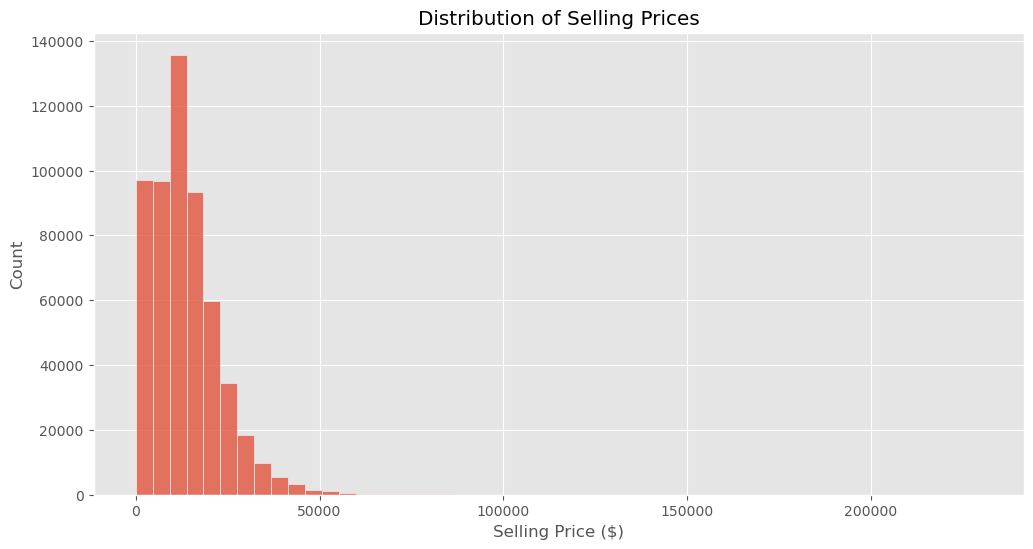

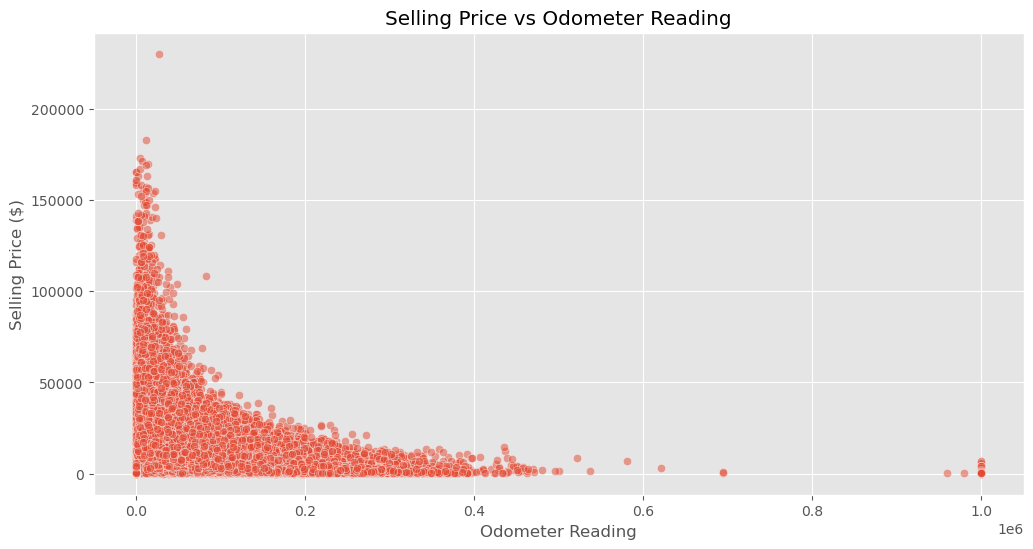

Top 10 makes by average selling price:
                       mean  count
make                              
Rolls-Royce   153488.235294     17
Ferrari       127210.526316     19
Lamborghini   112625.000000      4
Bentley        74367.672414    116
airstream      71000.000000      1
Tesla          67054.347826     23
Aston Martin   54812.000000     25
Fisker         46461.111111      9
Maserati       45320.300752    133
Lotus          40800.000000      1


In [13]:
# Basic statistics after cleaning
import seaborn as sns
print("Dataset shape after cleaning:", data.shape)
print("\
Summary statistics for key numerical columns:")
print(data[['year', 'odometer', 'sellingprice']].describe())

# Create visualizations
plt.style.use('ggplot')  

# Price distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='sellingprice', bins=50)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price ($)')
plt.ylabel('Count')
plt.show()

# Price vs Odometer
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='odometer', y='sellingprice', alpha=0.5)
plt.title('Selling Price vs Odometer Reading')
plt.xlabel('Odometer Reading')
plt.ylabel('Selling Price ($)')
plt.show()

# Top 10 makes by average price
top_makes = data.groupby('make')['sellingprice'].agg(['mean', 'count']).sort_values('mean', ascending=False).head(10)
print("\
Top 10 makes by average selling price:")
print(top_makes)

C:\Users\sbera\AppData\Local\Temp\ipykernel_10904\3528480665.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  model_data['condition'].fillna(model_data['condition'].median(), inplace=True)


Training Random Forest model...
Model Performance Metrics:
R-squared Score: 0.8976
Root Mean Square Error: $3120.38


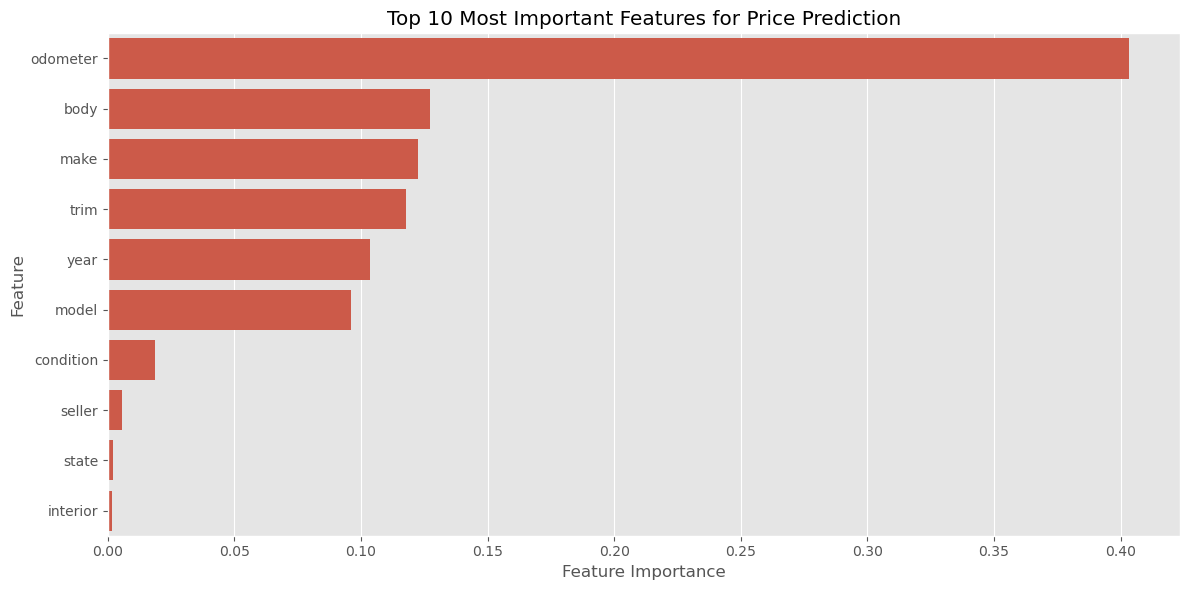

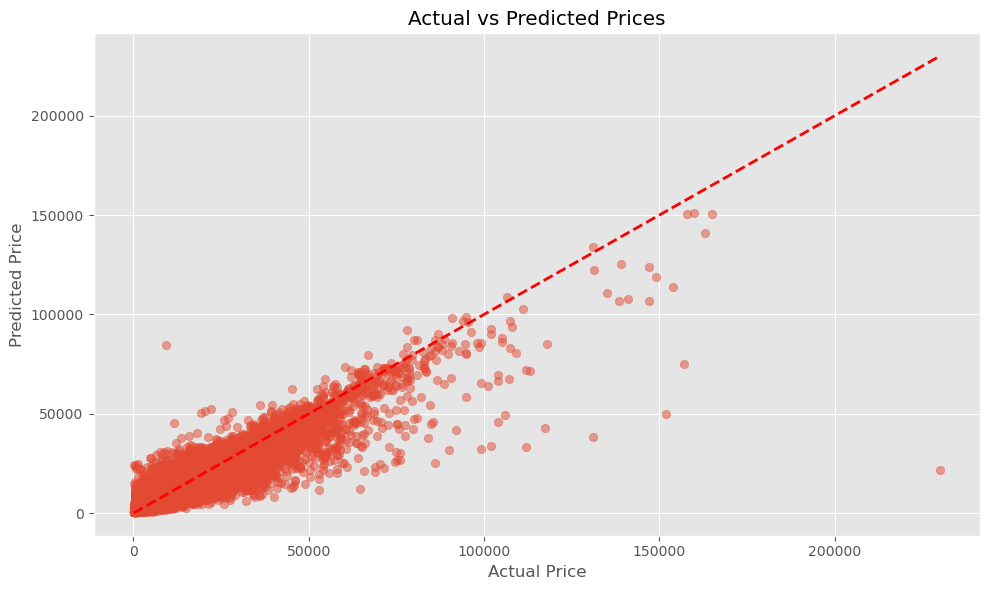

Top 10 Most Important Features:
      Feature  Importance
8    odometer    0.403311
4        body    0.127300
1        make    0.122578
3        trim    0.117766
0        year    0.103405
2       model    0.095884
7   condition    0.018744
11     seller    0.005574
6       state    0.001936
10   interior    0.001680


In [15]:
# Let's try just the Random Forest model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
features_to_drop = ['mmr', 'vin', 'saledate']
model_data = data.drop(features_to_drop, axis=1)

# Handle categorical variables
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']
le_dict = {}

for column in categorical_columns:
    le_dict[column] = LabelEncoder()
    model_data[column] = le_dict[column].fit_transform(model_data[column].astype(str))

# Fill missing values
model_data['condition'].fillna(model_data['condition'].median(), inplace=True)

# Split features and target
X = model_data.drop('sellingprice', axis=1)
y = model_data['sellingprice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest model...")
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\
Model Performance Metrics:")
print(f"R-squared Score: {r2:.4f}")
print(f"Root Mean Square Error: ${rmse:.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features for Price Prediction')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.tight_layout()
plt.show()

print("\
Top 10 Most Important Features:")
print(feature_importance.head(10))

Model Performance Metrics:
R-squared Score: 0.8976
Root Mean Square Error: $3120.38


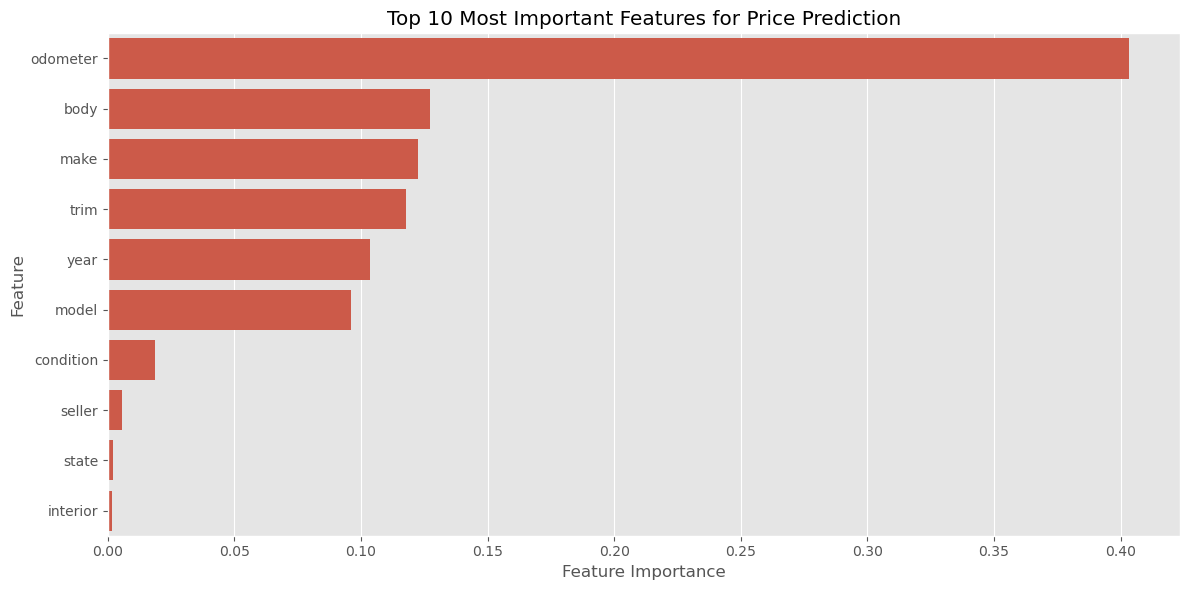

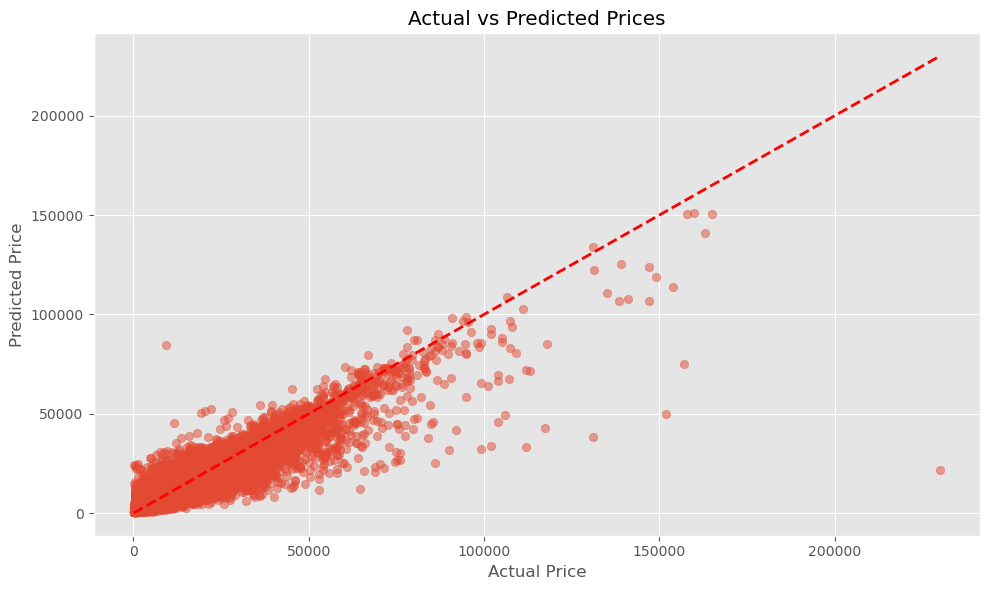

Top 10 Most Important Features:
      Feature  Importance
8    odometer    0.403311
4        body    0.127300
1        make    0.122578
3        trim    0.117766
0        year    0.103405
2       model    0.095884
7   condition    0.018744
11     seller    0.005574
6       state    0.001936
10   interior    0.001680


In [17]:
# Evaluate the Random Forest model's performance
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"R-squared Score: {r2:.4f}")
print(f"Root Mean Square Error: ${rmse:.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features for Price Prediction')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.tight_layout()
plt.show()

print("\
Top 10 Most Important Features:")
print(feature_importance.head(10))